In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets

%matplotlib inline
plt.style.use('seaborn-white')

In [9]:
def load_datasets():
    data = pd.read_csv("/users/Sushanta/Documents/GitHub/Illinois/CS598 Practical Statistical Learning/Coding2_myData.csv")
    X = np.array(data[data.columns[:-1]])
    y = np.array(data['Y']).reshape(-1,1)
    

    return X,y

In [46]:
X, y = load_datasets()

In [50]:
data = pd.read_csv("/users/Sushanta/Documents/GitHub/Illinois/CS598 Practical Statistical Learning/Coding2_myData.csv")

In [51]:
data.shape

(506, 14)

In [52]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Y
0,-5.064036,1.8,0.837248,0,-0.619897,1.883275,3.432567,1.408545,0.000000,5.690359,0.454865,3.9690,2.231591,3.178054
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,5.529585,1.602836,0.693147,5.488938,1.236450,3.9690,3.023243,3.072693
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,2.918119,1.602836,0.693147,5.488938,1.236450,3.9283,2.007486,3.546740
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,1.419592,1.802073,1.098612,5.402677,1.772241,3.9463,1.714643,3.508556
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,2.162710,1.802073,1.098612,5.402677,1.772241,3.9690,2.308679,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,2.479056,0,-0.556870,1.886008,3.969128,0.907694,0.000000,5.609472,4.447067,3.9199,3.109662,3.109061
502,-3.095111,0.0,2.479056,0,-0.556870,1.811562,5.152149,0.827460,0.000000,5.609472,4.447067,3.9690,3.013304,3.025291
503,-2.800824,0.0,2.479056,0,-0.556870,1.942476,7.899571,0.773574,0.000000,5.609472,4.447067,3.9690,2.374868,3.173878
504,-2.211009,0.0,2.479056,0,-0.556870,1.916040,7.535788,0.870833,0.000000,5.609472,4.447067,3.9345,2.545584,3.091042


In [19]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [21]:
#Load the diabetes dataset. In this case we will not be using a constant intercept feature
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1)
feature_name = diabetes['feature_names']

In [22]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [3]:
log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)

In [45]:
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()

log_lam_seq = np.linspace(-1, -8, num = 80)
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))
feature_names = data.columns[:-1]
for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(6.545782818637954e-05,
 3.5244762392941738,
 -861.1205248058349,
 825.1469480793919)

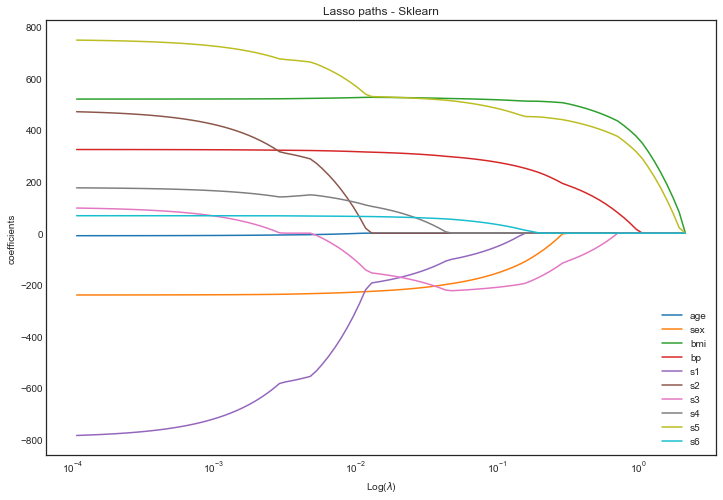

In [32]:
#Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X / np.linalg.norm(X,axis=0)  # Standardize data (easier to set the l1_ratio parameter)
m,n = X.shape

eps = 5e-5  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))
#neg_log_alphas_lasso = -np.log10(alphas_lasso)

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [44]:
alphas_lasso

array([2.14804358e+00, 1.94356173e+00, 1.75854543e+00, 1.59114165e+00,
       1.43967379e+00, 1.30262482e+00, 1.17862216e+00, 1.06642386e+00,
       9.64906224e-01, 8.73052500e-01, 7.89942742e-01, 7.14744571e-01,
       6.46704850e-01, 5.85142133e-01, 5.29439846e-01, 4.79040107e-01,
       4.33438144e-01, 3.92177236e-01, 3.54844137e-01, 3.21064942e-01,
       2.90501339e-01, 2.62847222e-01, 2.37825623e-01, 2.15185942e-01,
       1.94701433e-01, 1.76166936e-01, 1.59396820e-01, 1.44223127e-01,
       1.30493884e-01, 1.18071590e-01, 1.06831829e-01, 9.66620312e-02,
       8.74603416e-02, 7.91346019e-02, 7.16014265e-02, 6.47853676e-02,
       5.86181597e-02, 5.30380358e-02, 4.79891088e-02, 4.34208117e-02,
       3.92873911e-02, 3.55474492e-02, 3.21635291e-02, 2.91017394e-02,
       2.63314151e-02, 2.38248104e-02, 2.15568205e-02, 1.95047307e-02,
       1.76479884e-02, 1.59679978e-02, 1.44479329e-02, 1.30725698e-02,
       1.18281336e-02, 1.07021608e-02, 9.68337445e-03, 8.76157088e-03,
      

(6.545782818637954e-05,
 3.5244762392941738,
 -861.1205248058349,
 825.1469480793919)

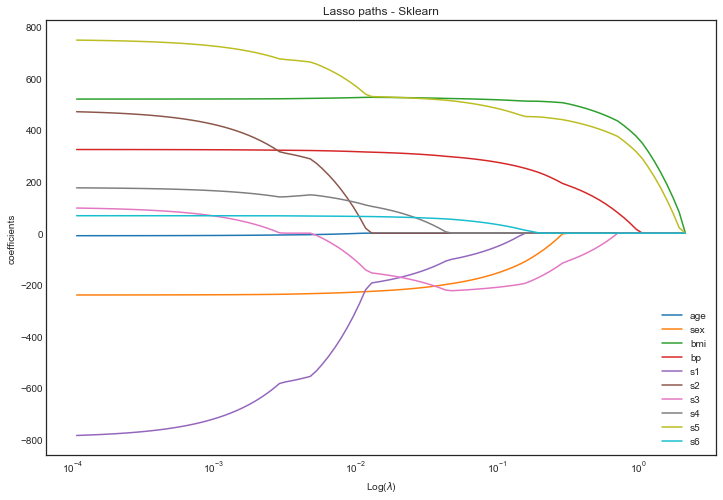

In [25]:
#Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X / np.linalg.norm(X,axis=0)  # Standardize data (easier to set the l1_ratio parameter)
m,n = X.shape

eps = 5e-5  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))
#neg_log_alphas_lasso = -np.log10(alphas_lasso)

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')